In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from graph_tool.all import *

In [13]:
df_trips=pd.read_csv('./raw-updated-sampled/trips.csv').drop(['Unnamed: 0'], axis=1) non updated

In [132]:
contact_network=load_graph('sampled_contact_network_26_09_2022.xml.gz')
# contact_network=load_graph('sampled_contact_network_22_08_2022.xml.gz')

In [150]:
pgraphs=[]

for i in ['wfh25', 'wfh50', 'wfh75']:
    pgraphs.append(load_graph('sampled_contact_network_04_10_2022_'+i+'.xml.gz'))

In [39]:
contact_network.vp['state'] = contact_network.new_vp('bool', vals=None, val=False)

In [22]:
contact_network.vp

{'age': <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f4c20fcbd00, at 0x7f4c221e2340>, 'all_neighbours': <VertexPropertyMap object with value type 'bool', for Graph 0x7f4c20fcbd00, at 0x7f4c20fcbc70>, 'id': <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f4c20fcbd00, at 0x7f4c20fcbfa0>, 'insee': <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f4c20fcbd00, at 0x7f4c20fcbca0>, 'keep': <VertexPropertyMap object with value type 'bool', for Graph 0x7f4c20fcbd00, at 0x7f4c20fcb9a0>}

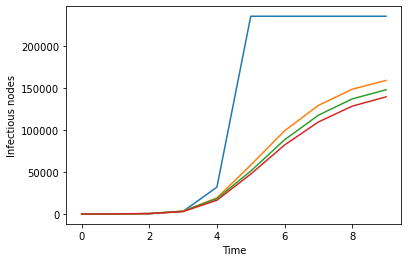

In [157]:
def run(contact_network, policy, ax):

    f=contact_network.vp['id'].a==2604967 # starting point used to make BFS sampling
    # print(sum(f))
        
    f=contact_network.get_vertices()[f][0]
    state = SIState(contact_network, beta=1., v0=f)

    X = []
    for t in range(10):
        ret = state.iterate_sync()
        X.append(state.get_state().fa.sum())
        unq, cnt=np.unique(state.get_state().fa*contact_network.vp['insee'].a, return_counts=True)
        pd.DataFrame({'insee': unq, 'counts': cnt}).to_csv(policy+'_state_'+ str(t) +'.csv', index=False)

    
    ax.plot(X)
    ax.set_xlabel(r"Time")
    ax.set_ylabel(r"Infectious nodes")
    

fig, ax=plt.subplots(figsize=(6, 4))

for p, g in zip(['baseline', 'wfh25', 'wfh50', 'wfh75'], [contact_network, pgraphs[0], pgraphs[1], pgraphs[2]]):
    run(g, p, ax)


# policy='baseline'
# run(contact_network, policy)